# Analysis of Tweets

In [1]:
#Importing packages
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud
import nltk
from collections import Counter
%matplotlib inline

In [2]:
#Importing dataset
train  = pd.read_csv(r'C:\Users\Dell user\Desktop\Professional\PhD Task 2 by TC\train_E6oV3lV.csv', engine = 'python')

#This test dataset belong to '#MidtermElection2018'
test = pd.read_csv(r'C:\Users\Dell user\Desktop\Professional\PhD Task 2 by TC\Notebooks\midtermelection.csv', engine = 'python')

- Please uncomment the below code to run this file for '#ThalapathyKingOfBoxOffice'

In [138]:
#This test dataset belongs to '#ThalapathyKingOfBoxOffice'
#test = pd.read_csv(r'C:\Users\Dell user\Desktop\Professional\PhD Task 2 by TC\Notebooks\thalapathyking.csv', engine = 'python')

<h3>Exploratory Data Analysis</h3>

In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
train.shape

(31962, 3)

In [5]:
test.head()

,created_at,text
0,2018-11-10 18:49:44,I was stunned by the #MidtermElection2018 \n\n...
1,2018-11-10 18:47:55,Watching the voting debacle unfold in America ...
2,2018-11-10 18:39:06,@CeeCee22063524 Didn't Q promise this would al...
3,2018-11-10 18:38:22,@MAGAPOTUS2018 I pray Trump resigns and/or is...
4,2018-11-10 16:56:12,"'The purpose of the government is to' ""protect..."


In [6]:
test.shape

(500, 2)

In [7]:
train.drop('id', axis = 1, inplace = True)
test.drop('created_at', axis = 1, inplace = True)
test.rename(columns = {'text':'tweet'}, inplace = True)

<h3>Text Preprocessing</h3>

- To save pre-processing resources, both train and test datasets are combined and processed together. 

In [8]:
data = train.append(test, ignore_index = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


#### Data Cleaning

- Remove Twitter User Handles

In [9]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [10]:
# remove twitter handles (@user)
data['clean tweet'] = np.vectorize(remove_pattern)(data['tweet'], "@[\w]*")

- Remove punctuations, numbers, special characters, non-english words

In [11]:
data['clean tweet'] = data['clean tweet'].str.replace('[^A-Za-z#]',' ')

- Remove Short Words

In [12]:
data['clean tweet'] = data['clean tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

- Remove stop words

In [13]:
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))

data['clean tweet'] = data['clean tweet'].apply(lambda x: ' '.join([w for w in x.split() if w not in stopWords]))

#### Preprocessing of data

- Conversion to lowercase

In [14]:
data['clean tweet'] = data['clean tweet'].str.lower()

- Tokenization

In [15]:
tokenised_tweet = data['clean tweet'].apply(lambda x: x.split())
tokenised_tweet.head()

0    [father, dysfunctional, selfish, drags, kids, ...
1    [thanks, #lyft, credit, use, cause, offer, whe...
2                                    [bihday, majesty]
3                           [#model, love, take, time]
4                   [factsguide, society, #motivation]
Name: clean tweet, dtype: object

- Stemming

In [16]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenised_tweet = tokenised_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenised_tweet.head()

0    [father, dysfunct, selfish, drag, kid, dysfunc...
1    [thank, #lyft, credit, use, caus, offer, wheel...
2                                    [bihday, majesti]
3                           [#model, love, take, time]
4                         [factsguid, societi, #motiv]
Name: clean tweet, dtype: object

In [17]:
for i in range(len(tokenised_tweet)):
    tokenised_tweet[i] = ' '.join(tokenised_tweet[i])

data['clean tweet'] = tokenised_tweet

<h3>Visualization</h3>

#### WordCloud
- Of all the words in the dataset

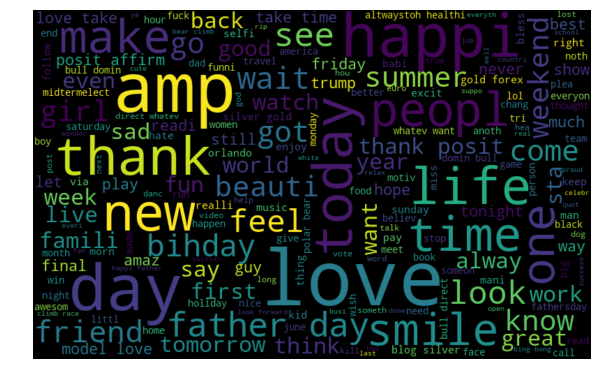

In [18]:
all_words = ' '.join([text for text in data['clean tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

- Of words in positive sentiment tweets 

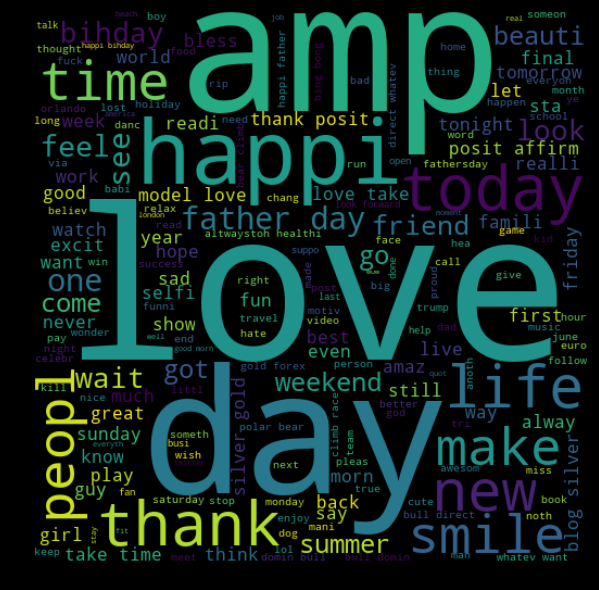

In [19]:
positive_words = ' '.join(list(data[data['label'] == 0]['clean tweet']))
positive_wc = WordCloud(width = 512,height = 512).generate(positive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(positive_wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

- Of words in negative sentiment tweets

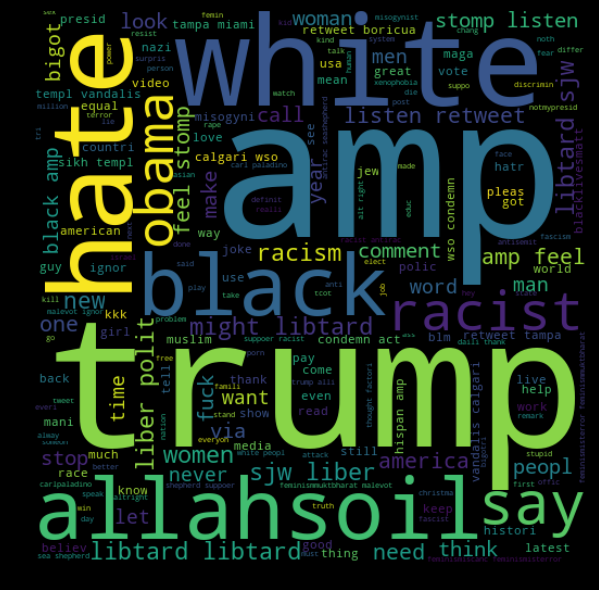

In [20]:
negative_words = ' '.join(list(data[data['label'] == 1]['clean tweet']))
negative_wc = WordCloud(width = 512,height = 512).generate(negative_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(negative_wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

#### Term Frequency Plots
- Frequency of most common words in positive sentiment tweets

In [52]:
positive_freq = Counter(positive_words.split(' '))
top_pos = positive_freq.most_common(10)

In [81]:
words_names=[]
words_count=[]
for (word, freq) in top_pos[:10]:
    words_names.append(word)
    words_count.append(freq)

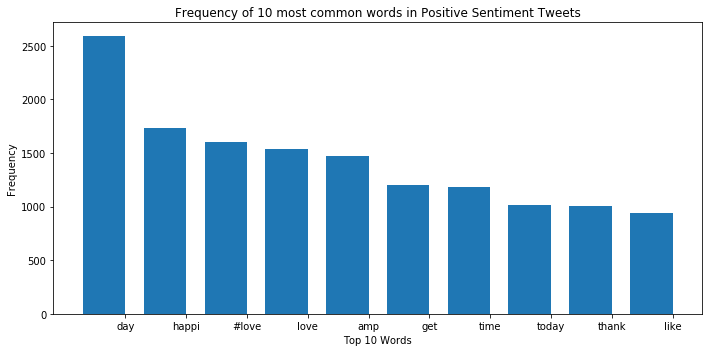

In [82]:
# Plot histogram using matplotlib bar()
plt.figure(figsize=(10,5))
plt.xlabel('Top 10 Words')
plt.ylabel('Frequency')
plt.title('Frequency of 10 most common words in Positive Sentiment Tweets')
indexes = np.arange(len(words_names) )
width = .7
plt.bar(indexes, words_count, width)
plt.xticks(indexes + width * .5, words_names)
#plt.legend()
plt.tight_layout()
plt.show()

- Frequency of most common words in negative sentiment tweets

In [43]:
negative_freq = Counter(negative_words.split(' '))
top_neg = negative_freq.most_common(10)

In [68]:
words_names=[]
words_count=[]
for (word, freq) in top_neg[:10]:
    words_names.append(word)
    words_count.append(freq)

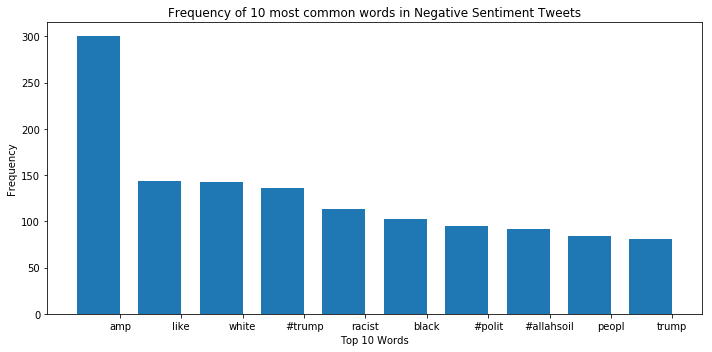

In [80]:
# Plot histogram using matplotlib bar()
plt.figure(figsize=(10,5))
plt.xlabel('Top 10 Words')
plt.ylabel('Frequency')
plt.title('Frequency of 10 most common words in Negative Sentiment Tweets')
indexes = np.arange(len(words_names) )
width = .7
plt.bar(indexes, words_count, width)
plt.xticks(indexes + width * .5, words_names)
#plt.legend()
plt.tight_layout()
plt.show()

#### Data Distribution

Distribution of Sentiment across dataset
- Positive
- Negative

In [84]:
sentiment_count = data['label'].value_counts()

In [89]:
sentiment_count.index

Float64Index([0.0, 1.0], dtype='float64')

In [90]:
sentiment_count.values

array([29720,  2242], dtype=int64)

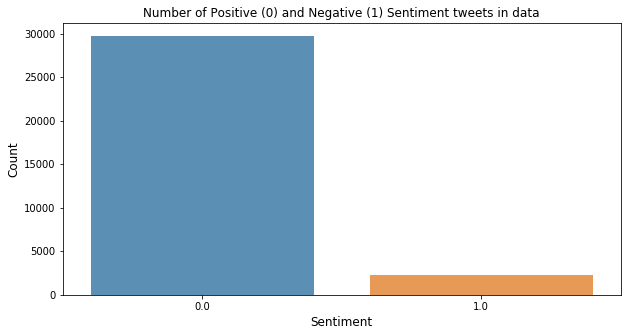

In [92]:
sentiment_count = sentiment_count[:2]
plt.figure(figsize=(10,5))
sns.barplot(sentiment_count.index, sentiment_count.values, alpha=0.8)
plt.title('Number of Positive (0) and Negative (1) Sentiment tweets in data')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Sentiment', fontsize=12)
plt.show()

<h3>Sentiment Analysis</h3>

#### Approach 1: Utilizing in-built package <i>TextBlob</i>

In [93]:
#Using 'textblob' package to do find out polarity of the tweet text which is then used to categorize tweets as positive, neutral or negative.
from textblob import TextBlob
def get_tweet_sentiment(twt):
        
        analysis = TextBlob(twt)
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'

In [119]:
clean_test = data[31962:]

In [122]:
#Creating a list of tuples containing the text and the sentiment: positive/neutral/negative
analysis = []
for twt in clean_test['clean tweet']:
    senti = (twt, get_tweet_sentiment(twt))
    analysis.append(senti)

#print(analysis)

In [121]:
#Printing the percentage of positive, neutral and negative sentiments in all the tweets
counts = Counter(x[1] for x in analysis)
print('No. of positive sentiments    = {}'.format(counts['positive']))
print('No. of neutral sentiments     = {}'.format(counts['neutral']))
print('No. of negative sentiments    = {}'.format(counts['negative']))
print('Total tweets analysed         = {}'.format(len(analysis)))
print('Percentage of positive tweets = {0:10.3f} %'.format((100*counts['positive']/len(analysis))))
print('Percentage of neutral tweets  = {0:10.3f} %'.format((100*counts['neutral']/len(analysis))))
print('Percentage of negative tweets = {0:10.3f} %'.format((100*counts['negative']/len(analysis))))

No. of positive sentiments    = 186
No. of neutral sentiments     = 247
No. of negative sentiments    = 67
Total tweets analysed         = 500
Percentage of positive tweets =     37.200 %
Percentage of neutral tweets  =     49.400 %
Percentage of negative tweets =     13.400 %


#### Approach 2: Building a Classification Model using <i>Logistic Regression</i> Algorithm

- Using Bag of Words Approach

In [126]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(data['clean tweet']) # bag-of-words feature matrix

<b>Train and Test Split</b>

In [127]:
train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

In [128]:
#splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state = 42, test_size=0.2)

<b>Fitting the Logistic Regression Model</b>

In [129]:
lreg = LogisticRegression()
lreg.fit(xtrain_bow,ytrain) # training the model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

- Predicting probability on X-test

In [130]:
prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

0.5697115384615384

In [133]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lreg.score(xvalid_bow,yvalid)))

Accuracy of logistic regression classifier on test set: 0.95


In [134]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int

In [135]:
submission = test[['label','tweet']]
submission.to_csv('testset_prediction.csv', index=False)

In [131]:
y_pred = lreg.predict(xvalid_bow)

In [136]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(yvalid, y_pred)
print(confusion_matrix)

[[5879   58]
 [ 277  179]]


In [137]:
from sklearn.metrics import classification_report
print(classification_report(yvalid, y_pred))

             precision    recall  f1-score   support

          0       0.96      0.99      0.97      5937
          1       0.76      0.39      0.52       456

avg / total       0.94      0.95      0.94      6393

